<a href="https://colab.research.google.com/github/TiGaI/HousingPriceKaggleProject3/blob/xiangwei/ames_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
### import necessary packages
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import decomposition
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
%matplotlib inline

#Add max display column
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Set visualisation colours
mycols = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]
sns.set_palette(palette = mycols, n_colors = 4)
print('My colours are ready! :)')

My colours are ready! :)


In [3]:
train_df = pd.read_csv('https://raw.githubusercontent.com/TiGaI/HousingPriceKaggleProject3/xiangwei/data/train_schrank.csv')

train_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
train_df = train_df.drop(train_df[(train_df['GrLivArea']>4000)].index)
train_df['GarageQuality'] = train_df['GarageQuality'].astype('int64')
train_df['GarageAge'] = train_df['GarageAge'].astype('int64')

train_missing = train_df.isna()
train_num_missing = train_missing.sum().to_frame()
#train_num_missing.sort_values(ascending = False)
train_num_missing['Percentage'] = train_num_missing[0]/1460
train_num_missing.columns = ['Missing Value', 'Percentage']
train_num_missing = train_num_missing.sort_values('Percentage', ascending = False)
train_num_missing 

,Missing Value,Percentage
MSZoning,0,0.0
TotRmsAbvGrd,0,0.0
SaleCondition,0,0.0
SaleType,0,0.0
YrSold,0,0.0
MoSold,0,0.0
MiscVal,0,0.0
MiscFeature,0,0.0
Fence,0,0.0
PoolQC,0,0.0


In [0]:
catTrain = train_df.loc[:, train_df.dtypes == 'object']
list(catTrain.columns)

train_full = pd.get_dummies(train_df, 
                          columns=list(catTrain.columns), 
                          drop_first=True)

In [5]:
y = train_full['SalePrice']
y_ad = train_full['SalePriceAd']
X = train_full.drop(['SalePrice', 'SalePriceAd'], 1)
X.head()

,MSZoning,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,WoodDeckSF,PoolArea,PoolQC,MiscVal,MoSold,YrSold,Pool,GarageQuality,HouseAge,GarageAge,Remodel,TotalBath,WeightTotalBsmtSF,TotalPorchSF,Condition2Renew,PUD,SFoyer,Floor,Finish,Slvl,ExteriorBin,Interest,Qrtr,ATNHPIUS11180Q,Rank,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.540963,65.0,19.212182,1.540963,0.0,7,2.055642,8.059126,1.820334,1.540963,1.820334,1.540963,0.730463,6,11.170327,0.730463,0.0,7.483296,11.692623,2.055642,0.730463,11.692623,11.686189,0.0,13.698888,3,0.730463,4,2.602594,5,0.000000,0,2,2,548,0.000000,0.0,0.0,0.0,2,2008,0.0,1,2.055642,2,0.730463,3.5,16.788250,5.714669,0.000000,0.0,0.0,2.0,0.730463,0,1.0,2.980690,1,7.738625,1.242917,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1.540963,80.0,19.712205,1.540963,0.0,6,2.602594,0.000000,1.540963,1.540963,1.820334,1.540963,1.820334,5,12.062832,0.730463,0.0,8.897844,12.792276,2.055642,0.730463,12.792276,0.000000,0.0,12.792276,3,0.730463,3,2.259674,5,0.730463,3,2,2,460,9.010206,0.0,0.0,0.0,5,2007,0.0,1,4.545286,4,0.730463,2.5,17.376701,0.000000,0.730463,0.0,0.0,1.0,0.730463,0,0.5,5.253548,2,7.724487,1.242917,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1.540963,68.0,20.347241,1.194318,0.0,7,2.055642,7.646538,1.820334,1.540963,1.820334,1.540963,1.194318,6,10.200343,0.730463,0.0,9.917060,11.892039,2.055642,0.730463,11.892039,11.724598,0.0,13.832085,3,0.730463,4,2.259674,5,0.730463,3,2,2,608,0.000000,0.0,0.0,0.0,9,2008,0.0,1,2.259674,2,0.730463,3.5,15.859376,5.053371,0.000000,0.0,0.0,2.0,0.730463,0,1.0,1.811667,3,7.701778,1.242917,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## **Preparation of data**

In [0]:
# First, re-create the training and test datasets
ntrain = train_full.shape[0]
train = train_full[:ntrain]
# test = all_data[ntrain:]

print(train.shape)
# print(test.shape)

(1456, 164)


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[02:05:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


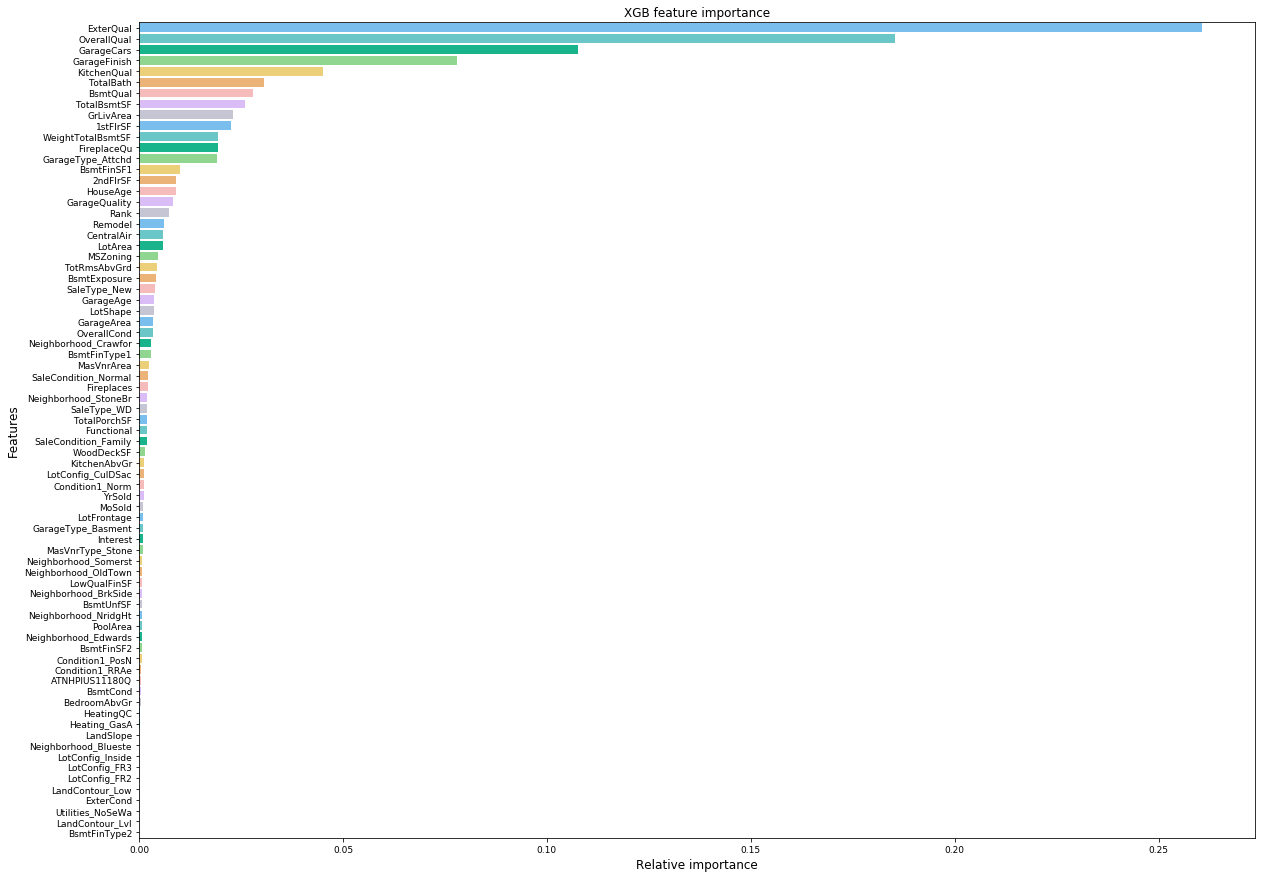

In [0]:
import xgboost as xgb

model = xgb.XGBRegressor()
y_train = y
model.fit(X, y_train)

# Sort feature importances from GBC model trained earlier
indices = np.argsort(model.feature_importances_)[::-1]
indices = indices[:75]

# Visualise these with a barplot
plt.subplots(figsize=(20, 15))
g = sns.barplot(y=X.columns[indices], x = model.feature_importances_[indices], orient='h', palette = mycols)
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("XGB feature importance");

In [0]:
pd.DataFrame(X.columns[indices],model.feature_importances_[indices])

,0
0.260632,ExterQual
0.185265,OverallQual
0.107693,GarageCars
0.077988,GarageFinish
0.045226,KitchenQual
0.030644,TotalBath
0.027844,BsmtQual
0.025910,TotalBsmtSF
0.022975,GrLivArea
0.022496,1stFlrSF


In [0]:
xgb_train = X.copy()
# xgb_test = test.copy()

import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(xgb_train, y_train)

# Allow the feature importances attribute to select the most important features
xgb_feat_red = SelectFromModel(model, prefit = True)

# Reduce estimation, validation and test datasets
xgb_train = xgb_feat_red.transform(xgb_train)
# xgb_test = xgb_feat_red.transform(xgb_test)


print("Results of 'feature_importances_':")
# print('X_train: ', xgb_train.shape, '\nX_test: ', xgb_test.shape)
print('X_train: ', xgb_train.shape)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[02:05:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Results of 'feature_importances_':
X_train:  (1456, 18)


In [0]:
# Next we want to sample our training data to test for performance of robustness ans accuracy, before applying to the test data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(xgb_train, y_train, test_size=0.3, random_state=42)

# X_train = predictor features for estimation dataset
# X_test = predictor variables for validation dataset
# Y_train = target variable for the estimation dataset
# Y_test = target variable for the estimation dataset

# print('X_train: ', X_train.shape, '\nX_test: ', X_test.shape, '\nY_train: ', Y_train.shape, '\nY_test: ', Y_test.shape)
print('X_train: ', X_train.shape, '\nX_test: ', X_test.shape, '\nY_train: ', Y_train.shape, '\nY_test: ', Y_test.shape)

X_train:  (1019, 18) 
X_test:  (437, 18) 
Y_train:  (1019,) 
Y_test:  (437,)


In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
#Machine Learning Algorithm (MLA) Selection and Initialization
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), LassoLarsIC(), RandomForestRegressor(), xgb.XGBRegressor()]

# First I will use ShuffleSplit as a way of randomising the cross validation samples.
shuff = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

#create table to compare MLA metrics
columns = ['Name', 'Parameters', 'Train Accuracy Mean', 'Test Accuracy']
before_model_compare = pd.DataFrame(columns = columns)

#index through models and save performance to table
row_index = 0
for alg in models:

    #set name and parameters
    model_name = alg.__class__.__name__
    before_model_compare.loc[row_index, 'Name'] = model_name
    before_model_compare.loc[row_index, 'Parameters'] = str(alg.get_params())
    
    alg.fit(X_train, Y_train)
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    training_results = np.sqrt((-cross_val_score(alg, X_train, Y_train, cv = shuff, scoring= 'neg_mean_squared_error')).mean())
    test_results = np.sqrt(((Y_test-alg.predict(X_test))**2).mean())
    
    before_model_compare.loc[row_index, 'Train Accuracy Mean'] = (training_results)*100
    before_model_compare.loc[row_index, 'Test Accuracy'] = (test_results)*100
    
    row_index+=1
    print(row_index, alg.__class__.__name__, 'trained...')

decimals = 3
before_model_compare['Train Accuracy Mean'] = before_model_compare['Train Accuracy Mean'].apply(lambda x: round(x, decimals))
before_model_compare['Test Accuracy'] = before_model_compare['Test Accuracy'].apply(lambda x: round(x, decimals))
before_model_compare

1 KernelRidge trained...
2 ElasticNet trained...


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 426146997802.89545, tolerance: 634515517.391386
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 389853549947.81396, tolerance: 509983914.29128635
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81388445331.98938, tolerance: 530872008.4430093
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 390132813675.7

3 Lasso trained...
4 GradientBoostingRegressor trained...
5 BayesianRidge trained...
6 LassoLarsIC trained...


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


7 RandomForestRegressor trained...
[02:06:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:06:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:06:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:06:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:06:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:06:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
8 XGBRegressor trained...


,Name,Parameters,Train Accuracy Mean,Test Accuracy
0,KernelRidge,"{'alpha': 1, 'coef0': 1, 'degree': 3, 'gamma':...",3164057.041,2877744.289
1,ElasticNet,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",3094734.019,2899477.286
2,Lasso,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",2953381.467,2787653.883
3,GradientBoostingRegressor,"{'alpha': 0.9, 'criterion': 'friedman_mse', 'i...",2565343.467,2333271.728
4,BayesianRidge,"{'alpha_1': 1e-06, 'alpha_2': 1e-06, 'compute_...",2958750.601,2786370.692
5,LassoLarsIC,"{'copy_X': True, 'criterion': 'aic', 'eps': 2....",2912093.755,2792069.345
6,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",2758310.096,2528138.581
7,XGBRegressor,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",2659142.938,2370024.295


In [0]:
### change the dtypes of the 'GarageQuality' and 'GarageAge'
train_df['GarageQuality'] = train_df['GarageQuality'].astype('int64')
train_df['GarageAge'] = train_df['GarageAge'].astype('int64')
#train_df.dtypes.sort_values()

In [0]:
numTrain = train_df.loc[:, train_df.dtypes != 'object']
catTrain = train_df.loc[:, train_df.dtypes == 'object']
print(catTrain.columns)
print(numTrain.columns)

Index(['Street', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'RoofStyle', 'RoofMatl', 'MasVnrType',
       'Foundation', 'Heating', 'Electrical', 'GarageType', 'PavedDrive',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')
Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'PoolArea', 'PoolQC', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice', 'Pool', 'GarageQuality', 'HouseAge', 'GarageAge',
       'Remod

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bba9a8940>,
      dtype=object)

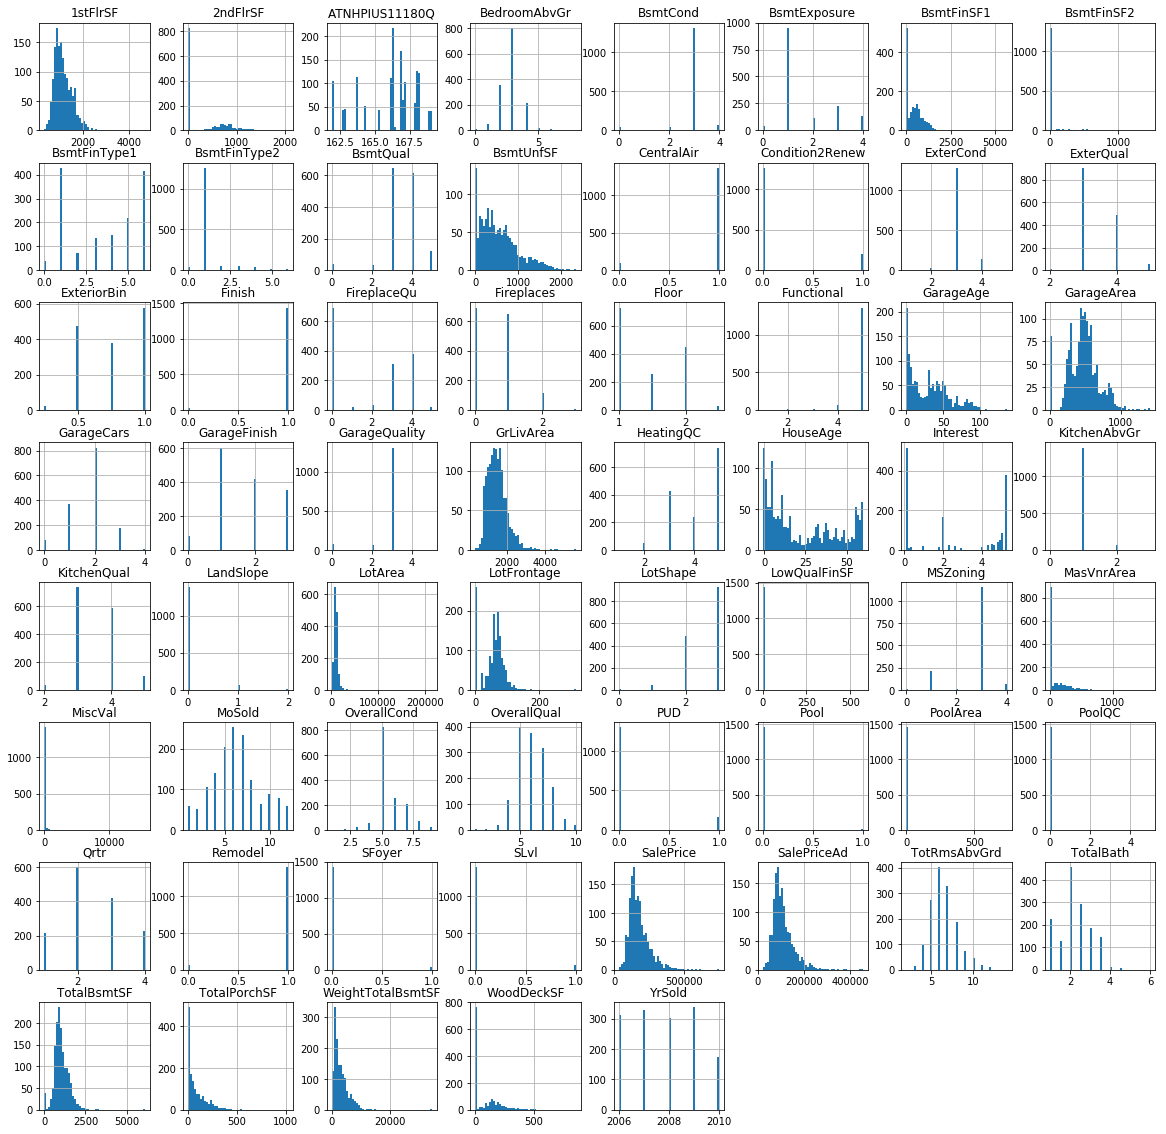

In [0]:
numTrain.hist(bins=50, figsize=(20,20))

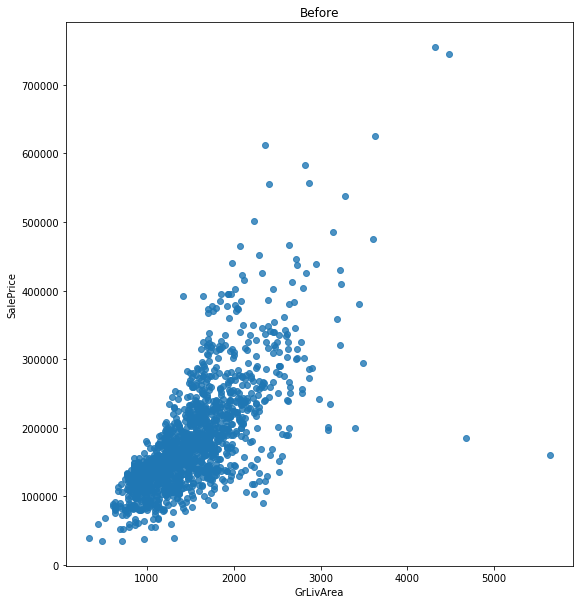

In [0]:
plt.subplots(figsize=(20, 10))

plt.subplot(1, 2, 1)
g = sns.regplot(x=train_df['GrLivArea'], y=train_df['SalePrice'], fit_reg=False).set_title("Before")

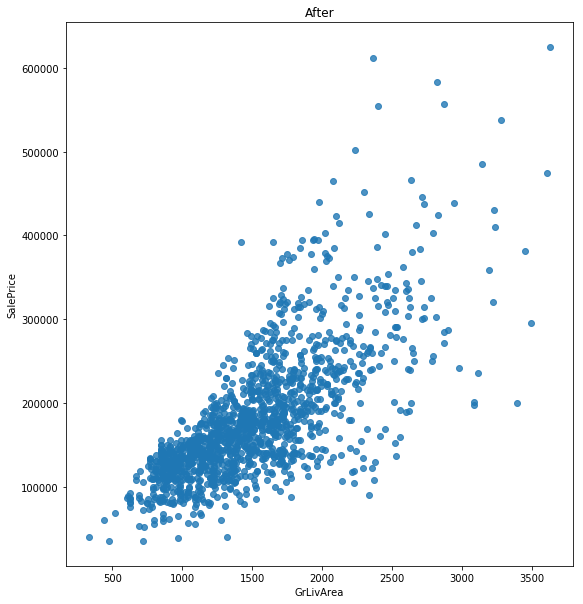

In [0]:

plt.subplots(figsize=(20, 10))
# Delete outliers
plt.subplot(1, 2, 2)                                                                                
train_df = train_df.drop(train_df[(train_df['GrLivArea']>4000)].index)
g = sns.regplot(x=train_df['GrLivArea'], y=train_df['SalePrice'], fit_reg=False).set_title("After")

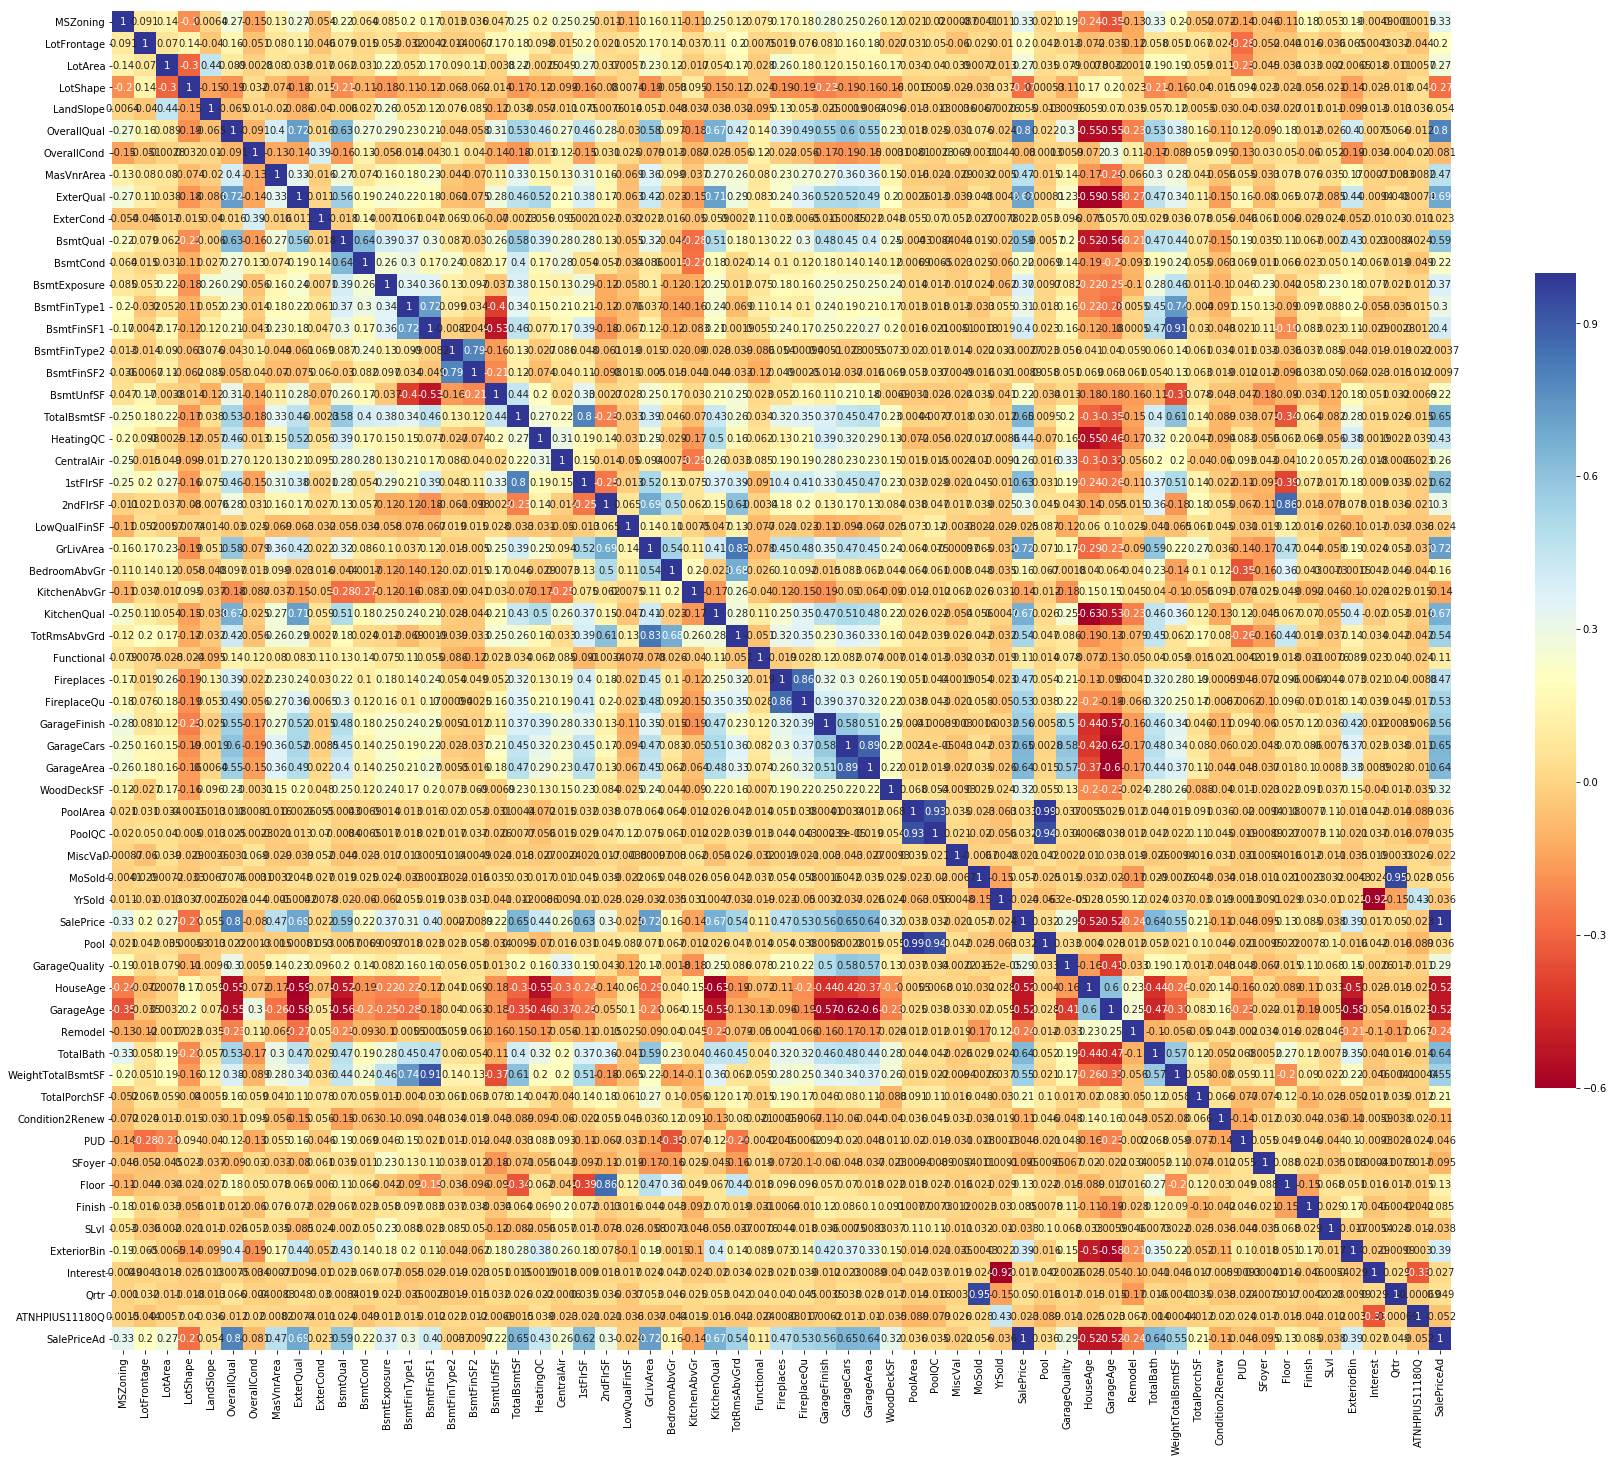

In [0]:
corr = train_df.corr()
plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True);

In [0]:
### PCA Analysis
X_num = X.loc[:, X.dtypes != 'object']

# Standardizing the features
X_num = StandardScaler().fit_transform(X_num)   # Use StandardScaler to help you standardize the features
X_num

array([ 0.35904396,  0.2128772 , -0.20714171,  0.70129102, -0.22571613,
        0.65147924, -0.51719981,  0.51410389,  1.05230219, -0.23811236,
        0.58316783,  0.11788424, -0.59055465,  1.16471151,  0.57542484,
       -0.27718931, -0.28865283, -0.94459061, -0.45930254,  0.89117944,
        0.26381257, -0.79343379,  1.16185159, -0.12024172,  0.37033344,
        0.16377912, -0.21145358,  0.73599434,  0.91220977,  0.23757092,
       -0.95122649, -1.00833355,  0.31847458,  0.31172464,  0.35100032,
       -0.75217584, -0.06869175, -0.06623607, -0.08768781, -1.5991111 ,
        0.13877749, -0.06940907,  0.26681404, -0.869941  , -0.99862993,
        0.21411509,  1.64225584,  0.58635262, -0.2480633 , -0.39261966,
       -0.35082321, -0.16124951,  1.23862409,  0.13199092, -0.21585871,
        1.08507424,  0.13348599, -1.56873745,  1.49008563])

Text(0, 0.5, 'cumulative explained variance')

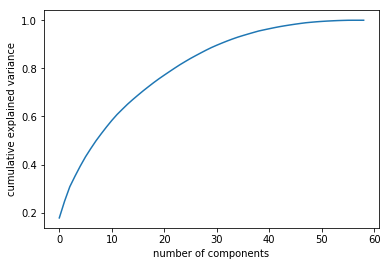

In [0]:
pca = PCA().fit(X_num)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [0]:
## gridsearchCV
def train_model(model, param_grid=[], X=[], y=[], 
                splits=5, repeats=5):

    # get unmodified training data, unless data to use already specified
    if len(y)==0:
        X,y = get_training_data()
    
    # create cross-validation method
    rkfold = RepeatedKFold(n_splits=splits, n_repeats=repeats)
    
    # perform a grid search if param_grid given
    if len(param_grid)>0:
        # setup grid search parameters
        gsearch = GridSearchCV(model, param_grid, cv=rkfold,
                               scoring=rmse_scorer,
                               verbose=1, return_train_score=True)

        # search the grid
        gsearch.fit(X,y)

        # extract best model from the grid
        model = gsearch.best_estimator_        
        best_idx = gsearch.best_index_

        # get cv-scores for best model
        grid_results = pd.DataFrame(gsearch.cv_results_)       
        cv_mean = abs(grid_results.loc[best_idx,'mean_test_score'])
        cv_std = grid_results.loc[best_idx,'std_test_score']

    # no grid search, just cross-val score for given model    
    else:
        grid_results = []
        cv_results = cross_val_score(model, X, y, scoring=rmse_scorer, cv=rkfold)
        cv_mean = abs(np.mean(cv_results))
        cv_std = np.std(cv_results)
    
    # combine mean and std cv-score in to a pandas series
    cv_score = pd.Series({'mean':cv_mean,'std':cv_std})

    # predict y using the fitted model
    y_pred = model.predict(X)
    
    # print stats on model performance         
    print('----------------------')
    print(model)
    print('----------------------')
    print('score=',model.score(X,y))
    print('rmse=',rmse(y, y_pred))
    print('cross_val: mean=',cv_mean,', std=',cv_std)
    
    # residual plots
    y_pred = pd.Series(y_pred,index=y.index)
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()
    z = (resid - mean_resid)/std_resid    
    n_outliers = sum(abs(z)>3)
    
    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y,y_pred,'.')
    plt.xlabel('y')
    plt.ylabel('y_pred');
    plt.title('corr = {:.3f}'.format(np.corrcoef(y,y_pred)[0][1]))
    ax_132=plt.subplot(1,3,2)
    plt.plot(y,y-y_pred,'.')
    plt.xlabel('y')
    plt.ylabel('y - y_pred');
    plt.title('std resid = {:.3f}'.format(std_resid))
    
    ax_133=plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    plt.xlabel('z')
    plt.title('{:.0f} samples with z>3'.format(n_outliers))

    return model, cv_score, grid_results

In [13]:


# linear_model.ElasticNetCV([l1_ratio, eps, …])	Elastic Net model with iterative fitting along a regularization path.
# linear_model.LarsCV([fit_intercept, …])	Cross-validated Least Angle Regression model.
# linear_model.LassoCV([eps, n_alphas, …])	Lasso linear model with iterative fitting along a regularization path.
# linear_model.LassoLarsCV([fit_intercept, …])	Cross-validated Lasso, using the LARS algorithm.
# linear_model.LogisticRegressionCV([Cs, …])	Logistic Regression CV (aka logit, MaxEnt) classifier.
# linear_model.MultiTaskElasticNetCV([…])	Multi-task L1/L2 ElasticNet with built-in cross-validation.
# linear_model.MultiTaskLassoCV([eps, …])	Multi-task Lasso model trained with L1/L2 mixed-norm as regularizer.
# linear_model.OrthogonalMatchingPursuitCV([…])	Cross-validated Orthogonal Matching Pursuit model (OMP).
# linear_model.RidgeCV([alphas, …])	Ridge regression with built-in cross-validation.
# linear_model.RidgeClassifierCV([alphas, …])	Ridge classifier with built-in cross-validation.

### MODEL IMPORTS
# LINEAR MODEL
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, BayesianRidge, LassoLarsIC
from sklearn.metrics import mean_squared_error, accuracy_score

#Grid Search
lasso_params = {'alpha':np.linspace(0.01, 10, num=10000)}
ridge_params = {'alpha':np.linspace(0,1000, num=10000)}
eNet_params = {"max_iter": np.linspace(1,1000,num=1000),
                      "alpha": np.linspace(0.0001,100,num=10000),
                      "l1_ratio": np.linspace(0.01,1,num=100)}
# bayesianRidge_params = {"n_iter": [100, 200, 300],
# 						"alpha_1": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
# 						"alpha_2": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
# 						"lambda_1": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
# 						"lambda_2": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
# }
# lassoLars_params = {"criterion": ['bic', 'aic'],
# 					"max_iter": [1, 5, 10, 100, 200, 500]
# 				}
# KRR_params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
# 					"degree": [1, 2, 3, 5, 7, 9],
# 					"kernel": ['linear', 'polynomial'],
# 					"coef0": [1,1.5,2,2.5]
# 				}

#Base Regression Model:
baseRegression = LinearRegression().fit(X, y)

#Grid Search
from sklearn.model_selection import GridSearchCV
lasso_Best = GridSearchCV(Lasso(), param_grid=lasso_params, scoring='neg_mean_squared_error', cv=10).fit(X, y)
print(lasso_Best.best_estimator_)

ridge_Best = GridSearchCV(Ridge(), param_grid=ridge_params, scoring='neg_mean_squared_error', cv=10).fit(X, y)
print(ridge_Best.best_estimator_)


eNet_Best = GridSearchCV(ElasticNet(), param_grid=eNet_params, scoring='neg_mean_squared_error', cv=10).fit(X, y)
print(eNet_Best.best_estimator_)

# bayesianRidge_Best = GridSearchCV(BayesianRidge(), bayesianRidge_params, scoring='r2', cv=5).fit(X, y)
# bayesianRidge_Best.best_estimator_

# lassoLarsIC_Best = GridSearchCV(LassoLarsIC(), lassoLars_params, scoring='r2', cv=5).fit(X, y)
# lassoLarsIC_Best.best_estimator_

# #Kernel ridge regression (KRR) combines ridge regression (linear least squares with l2-norm regularization) with the kernel trick. It thus learns a linear function in the space induced by the respective kernel and the data. For non-linear kernels, this corresponds to a non-linear function in the original space.
# KRR_Best = GridSearchCV(KernelRidge(), KRR_params, scoring='r2', cv=5).fit(X, y)
# KRR_Best.best_estimator_

# # The isotonic regression finds a non-decreasing approximation of a function while minimizing the mean squared error on the training data. The benefit of such a model is that it does not assume any form for the target function such as linearity.
# # https://scikit-learn.org/stable/auto_examples/plot_isotonic_regression.html
# from sklearn.isotonic import IsotonicRegression
# # no parameter needed
# Isotonic = IsotonicRegression().fit(X, y)


#SAVING model for feature use in PICKLE

# import pickle
# # Save the trained model as a pickle string. 
# baseRegression_model = pickle.dumps(baseRegression, open("baseRegression.pkl", "wb")) 
  
# # Load the pickled model 
# baseRegression_from_pickle = pickle.loads(open("baseRegression.pkl", "rb")) 
  
# # Use the loaded pickled model to make predictions 
# baseRegression_from_pickle.predict(X_test) 


# # Tree Base Model
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Ridge(alpha=6.300630063006301, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


ValueError: ignored